---
title: "Random Forest Classification for ML/Data Science Requirement"
format: html
jupyter: python3
execute:
  echo: true
  warning: false
  error: true
toc: true
---


In [1]:
import pandas as pd

df = pd.read_csv("data/lightcast_job_postings.csv")
df.columns


/var/folders/ml/69jz_hln1nv6px47r10h6ccm0000gn/T/ipykernel_69958/923314599.py:3: DtypeWarning: Columns (19,30) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("data/lightcast_job_postings.csv")


Index(['ID', 'LAST_UPDATED_DATE', 'LAST_UPDATED_TIMESTAMP', 'DUPLICATES',
       'POSTED', 'EXPIRED', 'DURATION', 'SOURCE_TYPES', 'SOURCES', 'URL',
       ...
       'NAICS_2022_2', 'NAICS_2022_2_NAME', 'NAICS_2022_3',
       'NAICS_2022_3_NAME', 'NAICS_2022_4', 'NAICS_2022_4_NAME',
       'NAICS_2022_5', 'NAICS_2022_5_NAME', 'NAICS_2022_6',
       'NAICS_2022_6_NAME'],
      dtype='object', length=131)

In [2]:
ml_keywords = ["machine learning", "data science", "ai", "artificial intelligence", "deep learning", "data scientist"]

def requires_ml(skills):
    if pd.isnull(skills):
        return 0
    skills = skills.lower()
    return int(any(kw in skills for kw in ml_keywords))

df["REQUIRES_ML"] = df["SKILLS_NAME"].apply(requires_ml)

In [3]:
features = ["TITLE", "SOC_2021_4_NAME", "NAICS2_NAME", "MIN_EDULEVELS_NAME", "MIN_YEARS_EXPERIENCE"]
target = "REQUIRES_ML"

df = df[features + [target, 'BODY']].dropna()

In [4]:
from sklearn.preprocessing import LabelEncoder

df_encoded = df.copy()
label_encoders = {}

for col in features:
    if df_encoded[col].dtype == "object":
        le = LabelEncoder()
        df_encoded[col] = le.fit_transform(df_encoded[col])
        label_encoders[col] = le

In [5]:
from sklearn.model_selection import train_test_split

X = df_encoded[features]
y = df_encoded[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.76      0.76      5257
           1       0.72      0.72      0.72      4614

    accuracy                           0.74      9871
   macro avg       0.74      0.74      0.74      9871
weighted avg       0.74      0.74      0.74      9871



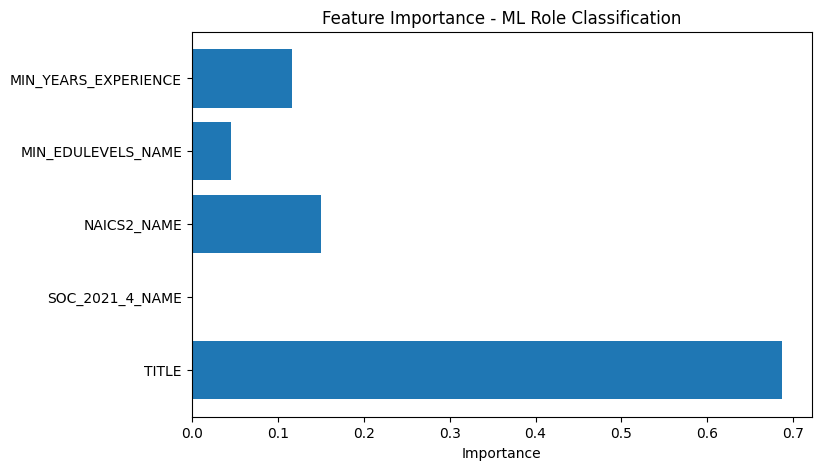

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.barh(features, rf.feature_importances_)
plt.xlabel("Importance")
plt.title("Feature Importance - ML Role Classification")
plt.show()

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Cleaned job descriptions
df['BODY_clean'] = df['BODY'].fillna("").str.lower()

# Target
y = df['REQUIRES_ML']  # this should be a binary 1/0 column

# TF-IDF vectorization
tfidf = TfidfVectorizer(max_features=5000, stop_words='english')
X = tfidf.fit_transform(df['BODY_clean'])

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.94      0.92      6644
           1       0.92      0.89      0.90      5694

    accuracy                           0.91     12338
   macro avg       0.91      0.91      0.91     12338
weighted avg       0.91      0.91      0.91     12338



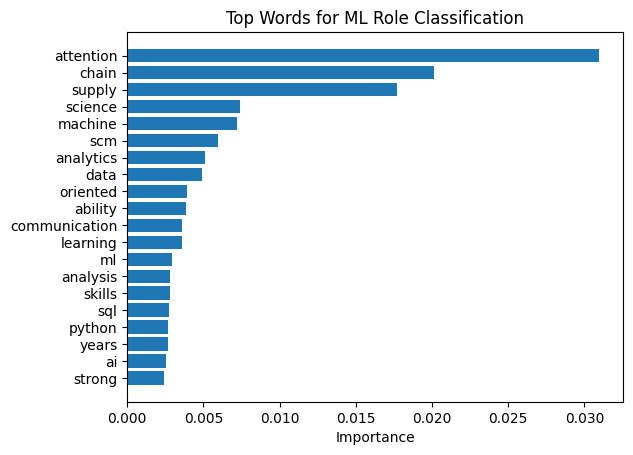

In [10]:
import numpy as np

importances = model.feature_importances_
top_idx = np.argsort(importances)[-20:]
top_words = [tfidf.get_feature_names_out()[i] for i in top_idx]

plt.barh(top_words, importances[top_idx])
plt.title("Top Words for ML Role Classification")
plt.xlabel("Importance")
plt.show()

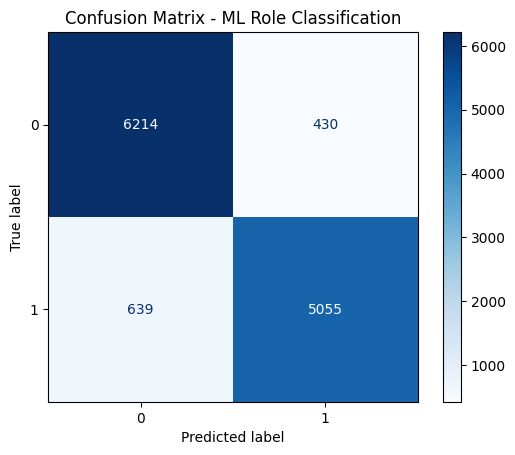

In [11]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)

# Plot
disp.plot(cmap="Blues")
plt.title("Confusion Matrix - ML Role Classification")
plt.show()